In [1]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)


In [2]:
path.ls()

(#2) [Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images')]

In [3]:
(path/'images').ls()

(#7393) [Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/liude/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg')...]

In [4]:
fname = (path/'images').ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [5]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

pets.summary(path/'images')


Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\liude\.fastai\data\oxford-iiit-pet\images\Russian_Blue_177.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x281
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\liude\.fastai\data\oxford-iiit-pet\images\Russian_Blue_177.jpg
    applying partial gives
      Russian_Blue
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=500x281, TensorCategory(9))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': Fals

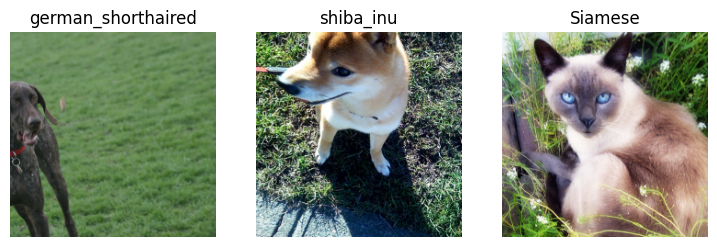

In [6]:
dls = pets.dataloaders(path/'images')
dls.show_batch(nrows=1,ncols=3)

In [7]:
learn = vision_learner(
    dls,
    resnet34,
    metrics=error_rate,
)

learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.500980,0.306416,0.110961,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.488906,0.273300,0.092693,01:00
1,0.334178,0.220036,0.077131,01:00


In [10]:
x, y = dls.one_batch()
y

TensorCategory([29, 26, 36, 20, 31, 26,  2, 17,  0, 17, 19,  2, 13, 27,  4, 26,
                27, 22,  0, 20, 16, 22, 10, 24, 16, 30, 33, 27,  3,  8,  7, 16,
                 3, 17,  6, 19, 12, 12,  1, 27, 20, 26,  9, 34, 11, 18,  8, 34,
                31, 35, 23, 28, 28,  3, 25, 30,  7, 21, 21, 25, 11, 21,  3, 15],
               device='cuda:0')

In [11]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

tensor([2.4845e-05, 1.3670e-05, 1.5980e-06, 6.3890e-06, 9.2015e-06, 1.7635e-06,
        2.8510e-07, 9.7096e-06, 2.3641e-06, 1.3547e-06, 2.4308e-04, 1.4236e-06,
        2.0745e-05, 2.6615e-06, 3.8109e-06, 2.4094e-06, 8.1505e-05, 4.4739e-05,
        1.8449e-06, 1.3344e-06, 3.1534e-06, 1.0942e-06, 1.9099e-06, 2.4439e-05,
        3.4341e-07, 6.5947e-07, 1.1090e-06, 1.7296e-06, 2.9937e-07, 9.9940e-01,
        1.1684e-05, 5.1912e-07, 2.3663e-06, 3.2038e-05, 3.6642e-05, 1.7195e-06,
        1.3071e-06])

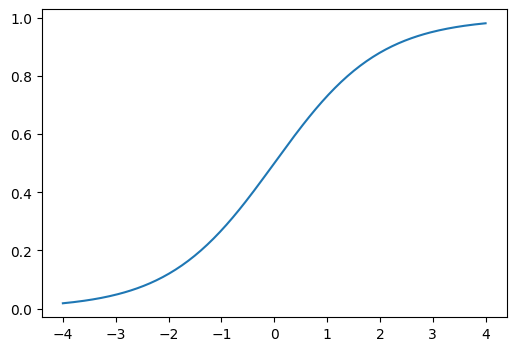

In [12]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, 200)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

plot_function(torch.sigmoid, min=-4, max=4)

In [13]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.7481,  0.1945],
        [ 0.9236,  3.1169],
        [ 0.5760,  2.5626],
        [-3.5066,  0.7087],
        [ 0.1253, -1.9525],
        [ 0.6703, -0.0464]])

In [14]:
acts.sigmoid()

tensor([[0.6788, 0.5485],
        [0.7158, 0.9576],
        [0.6402, 0.9284],
        [0.0291, 0.6701],
        [0.5313, 0.1243],
        [0.6616, 0.4884]])

In [15]:
def softmax(x):
    return exp(x)/exp(x).sum(dim=1, keepdim=True)

In [16]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6350, 0.3650],
        [0.1004, 0.8996],
        [0.1206, 0.8794],
        [0.0146, 0.9854],
        [0.8887, 0.1113],
        [0.6719, 0.3281]])

In [17]:
targ = tensor([0,1,0,1,1,0])
idx = range(6)
sm_acts[idx, targ]

tensor([0.6350, 0.8996, 0.1206, 0.9854, 0.1113, 0.6719])

In [18]:
print(-sm_acts[idx, targ])
# nll for negative log likelihood
#  nll_loss is designed to be used after log_softmax.
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6350, -0.8996, -0.1206, -0.9854, -0.1113, -0.6719])


tensor([-0.6350, -0.8996, -0.1206, -0.9854, -0.1113, -0.6719])

In [19]:
loss_func = nn.CrossEntropyLoss()

In [20]:
loss_func(acts, targ) 

tensor(0.8805)

In [21]:
# 一般nn和F都有
F.cross_entropy(acts, targ)

tensor(0.8805)

In [22]:
# 我们通常用nn而非F
# pytorch的loss function默认取mean，所以加个reduction='none'
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.4542, 0.1058, 2.1151, 0.0147, 2.1957, 0.3977])

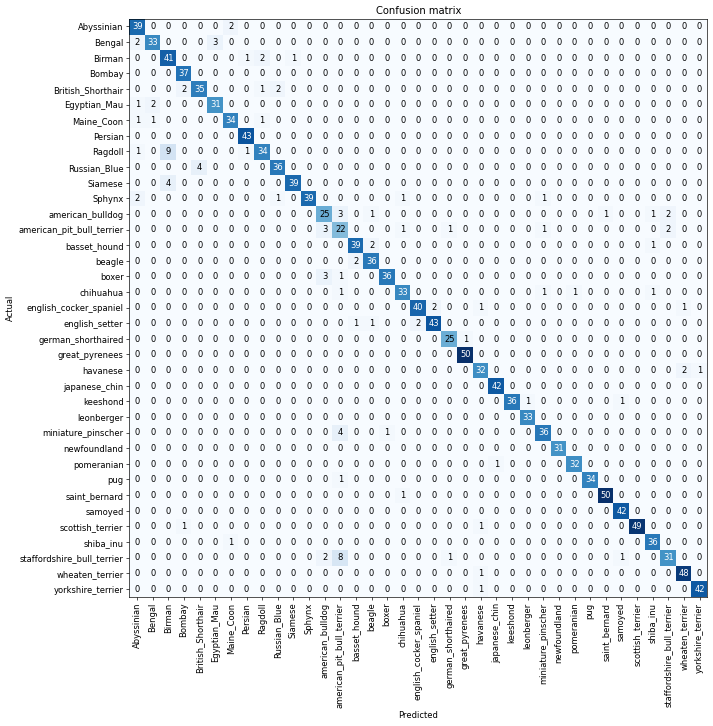

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 9),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8)]

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.696023,4.356715,0.434371,01:07


epoch,train_loss,valid_loss,error_rate,time
0,3.195133,1.534431,0.453315,01:20


SuggestedLRs(valley=0.0012022644514217973)

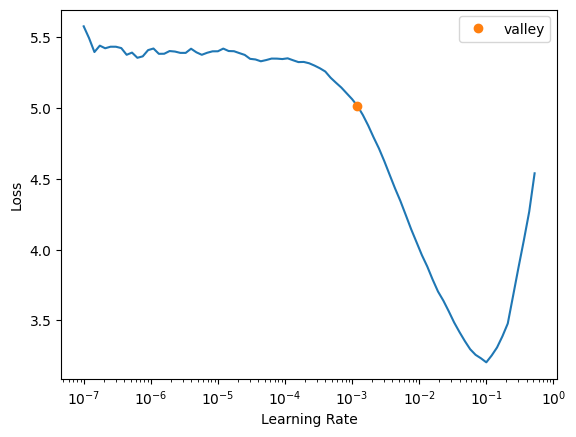

In [28]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

learn.lr_find()

In [31]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=0.0012022644514217973)

epoch,train_loss,valid_loss,error_rate,time
0,1.832769,0.342066,0.109608,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.551287,0.242332,0.071719,00:56
1,0.358580,0.203385,0.066306,00:57


In [33]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3,3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,1.129356,0.289491,0.094723,00:53
1,0.535600,0.229882,0.077131,00:51
2,0.318126,0.198032,0.069689,00:51


epoch,train_loss,valid_loss,error_rate,time



KeyboardInterrupt



<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

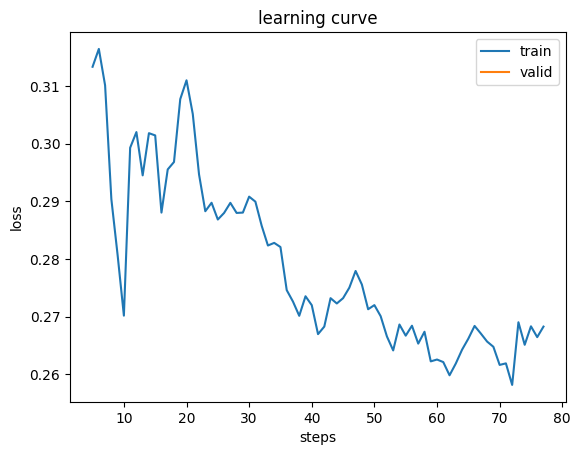

In [34]:
learn.recorder.plot_loss()